**ANÁLISES DO DATASET DA NETFLIX [2021]**

*INTRODUÇÃO*

Netflix é uma das plataformas de mídia e streaming de vídeo mais renomadas à nível mundial, com mais de 8.000 filmes e programas de TV disponíveis em sua vasta biblioteca. Este conjunto de dados tabular compreende uma lista abrangente de todos os títulos de filmes e programas de TV presentes no catálogo da Netflix em meados de 2021, oferecendo detalhes abrangentes, incluindo informações sobre elenco, diretores, classificações, ano de lançamento, duração e muito mais. É importante destacar que essa informação foi obtida a partir do Kaggle, uma fonte confiável amplamente reconhecida na comunidade de ciência de dados e análise de dados.

*PROCESSAMENTO*

[PANDAS]

In [21]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [11]:
def processamento_df(df):
    
    # 3 primeiras linhas do df
    df_3_linhas = df.head(3)
        
    # selecionando aleatoriamente 100 linhas do df
    df_menor = df.sample(100)
    
    # removendo colunas com muitos dados nulos
    df = df.drop(columns='country')
    
    # ordenando por ano de lançamento
    df = df.sort_values("release_year")

    # removendo dados duplicados
    df = df.drop_duplicates()
    
    # reset index
    df = df.reset_index()
    
    # lista de colunas
    colunas = list(df.columns) 
    
    # filtro com múltiplas condições
    df_filtrado = df[(df['type'] == 'Movie') & (df['listed_in'] == 'Documentaries')]

    # Entrada com string específica (lidando com valores ausentes)
    df['director'] = df['director'].fillna('')  # Preencher valores ausentes com string vazia
    df_string = df[df['director'].str.contains('Alice')]

    df_string = df[df['director'].str.contains('Alice')]

    # Procurar por títulos lançados em 2020
    df_consulta = df.query("release_year == 2020")

    df_loc = df.loc[:, ["title", "duration"]]

    return df_3_linhas, df_menor, df, colunas, df_filtrado, df_string, df_consulta, df_loc

# Para chamar a função e atribuir os valores retornados a variáveis, você pode fazer o seguinte:
df_3_linhas, df_menor, df, colunas, df_filtrado, df_string, df_consulta, df_loc = processamento_df(df)

In [13]:
df_filtrado.head(3)

,index,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
4,8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
5,8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
63,716,s717,Movie,FTA,Francine Parker,"Jane Fonda, Donald Sutherland, Pamela Donegan,...","June 15, 2021",1972,TV-MA,104 min,Documentaries,The restored documentary captures the Pacific ...


In [17]:
df_string.shape

(5, 12)

In [19]:
df_consulta.head(5)

,index,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
7262,1775,s1776,Movie,His House,Remi Weekes,"Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...","October 30, 2020",2020,TV-14,93 min,"Horror Movies, Independent Movies",As a young couple from war-torn South Sudan se...
7263,1561,s1562,Movie,Torbaaz,Girish Malik,"Sanjay Dutt, Nargis Fakhri, Rahul Dev, Priyank...","December 11, 2020",2020,TV-MA,133 min,"Dramas, International Movies, Sports Movies","At an Afghanistan refugee camp, an ex-army doc..."
7264,1580,s1581,Movie,Spirit Riding Free: Ride Along Adventure,"Beth Sleven, Allan Jacobsen, Kevin Wotton","Amber Frank, Bailey Gambertoglio, Sydney Park,...","December 8, 2020",2020,TV-Y7,79 min,Children & Family Movies,Join Lucky and her friends on an interactive m...
7265,1560,s1561,Movie,The Prom,Ryan Murphy,"Meryl Streep, James Corden, Nicole Kidman, Ker...","December 11, 2020",2020,PG-13,132 min,"Comedies, LGBTQ Movies, Music & Musicals",A group of down-on-their-luck Broadway stars s...
7266,1595,s1596,Movie,MANK,David Fincher,"Gary Oldman, Amanda Seyfried, Charles Dance, L...","December 4, 2020",2020,R,133 min,"Dramas, Independent Movies",1930s Hollywood is reevaluated through the eye...


In [20]:
df_loc

,title,duration
0,Pioneers: First Women Filmmakers*,1 Season
1,Prelude to War,52 min
2,The Battle of Midway,18 min
3,Undercover: How to Operate Behind Enemy Lines,61 min
4,Why We Fight: The Battle of Russia,82 min
...,...,...
8802,Special,2 Seasons
8803,Little Singham Future mein Satakli,47 min
8804,The Neighbor,2 Seasons
8805,Alma Matters,1 Season


In [24]:
# Agrupar títulos por tipo
dado_agrupado = df.groupby('type')

# Contagem de títulos por tipo, usando os dados agrupados no passo anterior
contagem_titulos = dado_agrupado['show_id'].count()

print("Número de tipos de títulos na Netflix")
print(contagem_titulos)

Número de tipos de títulos na Netflix
type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64


In [67]:
# Diretor com mais títulos na plataforma
diretor_titulos = df['director'].value_counts().idxmax()
print("Diretor com mais títulos na plataforma:", diretor_titulos)


Diretor com mais títulos na plataforma: Rajiv Chilaka


**VISUALIZAÇÕES**

[MATPLOLIB]

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Quantidade')

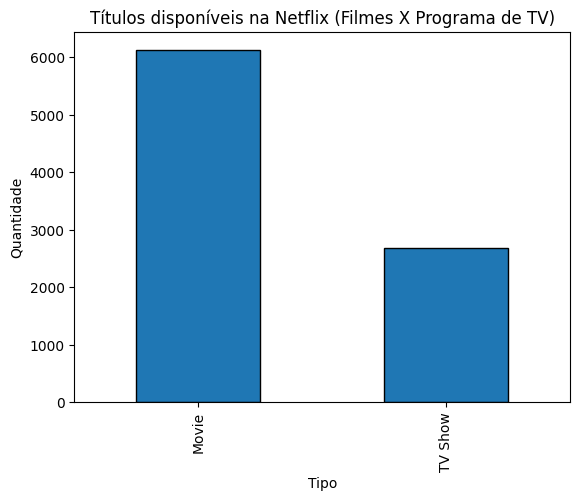

In [36]:
quantidade_titulos = df['type'].value_counts()
quantidade_titulos.plot(kind='bar', edgecolor='black');

plt.title('Títulos disponíveis na Netflix (Filmes X Programa de TV)')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

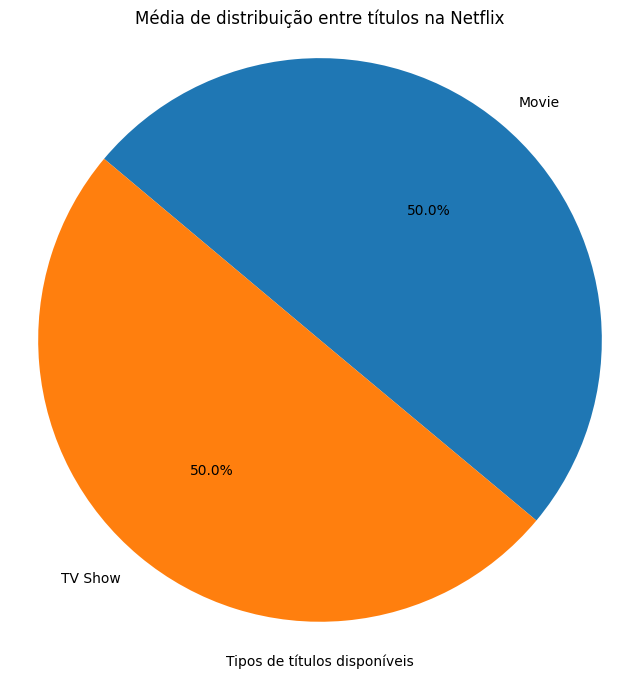

In [59]:
# Esse eu precisei de ajuda pra fazer!!!

media_distribuicao_de_titulos = df.groupby('type')['release_year'].mean()

plt.figure(figsize=(8, 8))
plt.pie(media_distribuicao_de_titulos, labels=media_distribuicao_de_titulos.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.axis('equal')

plt.xlabel('Tipos de títulos disponíveis')
plt.title('Média de distribuição entre títulos na Netflix')

plt.show()

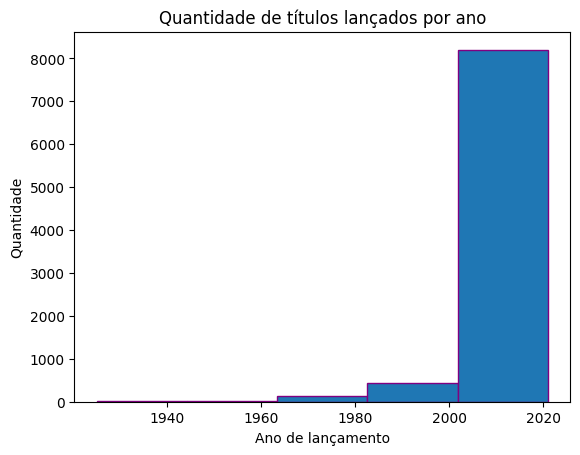

In [48]:
df['release_year'].plot.hist(bins=5, edgecolor='purple')

plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade')
plt.title('Quantidade de títulos lançados por ano');

[NUMPY]

In [60]:
import numpy as np

In [64]:
# Número de títulos disponíveis por ano
contagem_por_ano = np.unique(df['release_year'], return_counts=True)

# Mostra o número de títulos disponíveis para cada ano de lançamento
for ano, contagem in zip(*contagem_por_ano):
    print(f"Títulos disponíveis em {ano}: {contagem}")

Títulos disponíveis em 1925: 1
Títulos disponíveis em 1942: 2
Títulos disponíveis em 1943: 3
Títulos disponíveis em 1944: 3
Títulos disponíveis em 1945: 4
Títulos disponíveis em 1946: 2
Títulos disponíveis em 1947: 1
Títulos disponíveis em 1954: 2
Títulos disponíveis em 1955: 3
Títulos disponíveis em 1956: 2
Títulos disponíveis em 1958: 3
Títulos disponíveis em 1959: 1
Títulos disponíveis em 1960: 4
Títulos disponíveis em 1961: 1
Títulos disponíveis em 1962: 3
Títulos disponíveis em 1963: 2
Títulos disponíveis em 1964: 2
Títulos disponíveis em 1965: 2
Títulos disponíveis em 1966: 1
Títulos disponíveis em 1967: 5
Títulos disponíveis em 1968: 3
Títulos disponíveis em 1969: 2
Títulos disponíveis em 1970: 2
Títulos disponíveis em 1971: 5
Títulos disponíveis em 1972: 5
Títulos disponíveis em 1973: 10
Títulos disponíveis em 1974: 7
Títulos disponíveis em 1975: 7
Títulos disponíveis em 1976: 9
Títulos disponíveis em 1977: 7
Títulos disponíveis em 1978: 7
Títulos disponíveis em 1979: 11
Título

Profª tive a ideia de tentar fazer a função do df usando o Numpy, mas sem o ChatGPT não foi.
Usei a mesma lógica da função de pré-processamento, mas os detalhes eu precisei de ajuda.
Não sei fazer sozinha!!

In [74]:
def analisar_dados(dataframe):
    # Converter o DataFrame em um array NumPy
    dados = dataframe.values

    # Seleção de Elementos de Array
    elemento = dados[0, 2]  # Acessa o título da primeira linha

    # Slicing de Arrays
    sub_array = dados[:, 0:3]  # Seleciona as primeiras três colunas

    # Divisão de Arrays
    dados_anos_2020 = dados[dados[:, 7] == 2020]  # Filtra os títulos lançados em 2020

    # Reshaping de Arrays
    array_2d = np.reshape(dados, (len(dataframe), len(dataframe.columns)))

    # Operações Numéricas
    media_coluna = np.mean(dados[:, 7])  # Calcula a média dos anos de lançamento

    return elemento, sub_array, dados_anos_2020, array_2d, media_coluna

# Chame a função com seu DataFrame para realizar as operações
elemento, sub_array, dados_anos_2020, array_2d, media_coluna = analisar_dados(df)

print(f"Elemento: {elemento}")
print(f"Sub-array:\n{sub_array}")
print(f"Dados de 2020:\n{dados_anos_2020}")
print(f"Array 2D:\n{array_2d}")
print(f"Média dos anos de lançamento: {media_coluna}")

Elemento: Dick Johnson Is Dead
Sub-array:
[['s1' 'Movie' 'Dick Johnson Is Dead']
 ['s2' 'TV Show' 'Blood & Water']
 ['s3' 'TV Show' 'Ganglands']
 ...
 ['s8805' 'Movie' 'Zombieland']
 ['s8806' 'Movie' 'Zoom']
 ['s8807' 'Movie' 'Zubaan']]
Dados de 2020:
[['s1' 'Movie' 'Dick Johnson Is Dead' ... '90 min' 'Documentaries'
  'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.']
 ['s17' 'Movie' "Europe's Most Dangerous Man: Otto Skorzeny in Spain" ...
  '67 min' 'Documentaries, International Movies'
  'Declassified documents reveal the post-WWII life of Otto Skorzeny, a close Hitler ally who escaped to Spain and became an adviser to world presidents.']
 ['s18' 'TV Show' 'Falsa identidad' ... '2 Seasons'
  'Crime TV Shows, Spanish-Language TV Shows, TV Dramas'
  'Strangers Diego and Isabel flee their home in Mexico and pretend to be a married couple to escape his drug-dealing enemies and her a

INSIGHTS

**Países de Produção**: Com o Pandas daria para analisar os países de produção dos títulos e quem sabe calcular a contagem de títulos produzidos em cada país e criar um gráfico de barras para exibir essas informações.

**Duração dos Títulos**: Uma análise referente a duração dos títulos (por exemplo, 90 minutos, 2 temporadas) seria possível. E quem sabe aqui implementar a média e desvio padrão, para a duração.

**Elenco**: Identificar o elenco mais frequente.

**Listas de Gêneros**: criar uma lista de gêneros associadas aos títulos e talvez quais os mais populares e representá-los em gráficos.